## _Track Evaluation_

- Running _`trkx_from_gnn.py`_ produces recostucted tracks (track candiates)
- Running _`trkx_reco_eval.py`_ gives reconstruction evaluation: _`eff, fake rate, dup. rate, etc`_

Let's perform inspection after track evaluation.

In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
sys.path.append("..")

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## _A. Inspection of Epsilon in DBSCAN_

1. Various $\epsilon$ for DBSCAN in `trkx_from_gnn.py`
2. Choose the best $\epsilon$ based on _`eff, fake rate, dup. rate`_) after `trkx_reco_eval.py`

**NOTE:** The $\epsilon$ in DBSCAN is alternative to chosing a cut on the `edge_score`.

In [7]:
epsilon = [
    0.015,
    0.025,
    0.050,
    0.075,
    0.1,
    0.15,
    0.2,
    0.25,
    0.35,
    0.45,
    0.55,
    0.75,
    0.85,
    0.95,
    1.0,
]

In [8]:
# Muons: DNN LN
outname = "dnn"
eff_phys = [
    0.1708,
    8.3673,
    36.7104,
    62.9073,
    70.4835,
    74.1022,
    75.7477,
    76.4197,
    76.5448,
    75.8893,
    74.4427,
    68.5609,
    63.3662,
    52.7343,
    0.7349,
]
eff_tech = [
    0.1747,
    8.6013,
    37.2240,
    64.0621,
    71.8009,
    75.4744,
    77.1188,
    77.7886,
    77.9088,
    77.2419,
    75.7630,
    69.7543,
    64.4568,
    53.6553,
    0.7514,
]
purity = [
    5.8608,
    68.1184,
    91.0142,
    95.6769,
    95.9568,
    96.0281,
    95.9904,
    95.8376,
    95.3498,
    94.7540,
    93.8815,
    91.3093,
    89.0565,
    83.6899,
    5.9280,
]
clones = [
    4.4050,
    45.4327,
    56.3284,
    41.7467,
    22.4429,
    16.5911,
    14.1281,
    12.7071,
    10.7304,
    9.1478,
    7.4382,
    5.0694,
    4.1512,
    2.7415,
    0.1389,
]

In [9]:
# Muons: IGNN
outname = "gnn"
eff_phys = [
    88.2250,
    88.8337,
    89.6347,
    90.1322,
    90.4533,
    90.9524,
    91.2334,
    91.1832,
    88.4393,
    85.1644,
    83.5178,
    81.4443,
    80.1778,
    77.6377,
    0.7349,
]
eff_tech = [
    89.8331,
    90.4563,
    91.2791,
    91.7934,
    92.1251,
    92.6372,
    92.9258,
    92.8686,
    90.0497,
    86.7017,
    85.0175,
    82.9097,
    81.6185,
    79.0440,
    0.7514,
]
purity = [
    97.2793,
    97.4626,
    97.7950,
    98.0192,
    98.2108,
    98.5698,
    98.8359,
    98.9482,
    98.0389,
    96.9250,
    96.3454,
    95.6658,
    95.2468,
    94.4137,
    5.9280,
]
clones = [
    14.9108,
    14.2468,
    13.3162,
    12.7301,
    12.2580,
    11.4377,
    10.4787,
    9.0237,
    4.5875,
    2.3772,
    1.7618,
    1.3914,
    1.3140,
    1.2631,
    0.1389,
]

In [10]:
# covert to ndarrays
eff_phys = np.array(eff_phys)
eff_tech = np.array(eff_tech)
purity = np.array(purity)
clones = np.array(clones)
epsilon = np.array(epsilon)

In [11]:
# plt.style.use('ggplot')
# mpl.rcParams.update(mpl.rcParamsDefault)

In [12]:
import matplotlib.ticker as ticker

In [47]:
# init subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(
    epsilon, purity, linestyle="-", linewidth=1.5, color="red", label="Tracking Purity"
)
ax.plot(
    epsilon,
    eff_phys,
    linestyle="-",
    linewidth=1.5,
    color="blue",
    label="Tracking Efficiency (Phys.)",
)
ax.plot(
    epsilon,
    eff_tech,
    linestyle="-",
    linewidth=1.5,
    color="orange",
    label="Tracking Efficiency (Tech.)",
)
ax.plot(
    epsilon, clones, linestyle="-", linewidth=1.5, color="green", label="Clone Rate"
)

# plt.axvline(x=0.10, linewidth=0.5, color='k')
plt.axvline(x=0.15, linewidth=0.5, color="k")
plt.axvline(x=0.20, linewidth=0.5, color="magenta")
plt.axvline(x=0.25, linewidth=0.5, color="k")
# plt.axvline(x=0.3, linewidth=0.5, color='magenta')

# plotting params
# ax.set_title('Track evaluation (efficiency vs epsilon)')
ax.set_xlabel(r"$\epsilon_{db}$", fontsize=20)
ax.set_ylabel("Counts [%]", fontsize=20)
ax.set_xlim(0, 0.95)
# ax.set_ylim(0.0, 100)
# ax.set_yscale('log')

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%0.2f"))


ax.grid(False)
ax.legend(fontsize=15, loc="best")
fig.tight_layout()
fig.savefig(outname + "_epsilon_scan.pdf")

ERROR! Session/line number was not unique in database. History logging moved to new session 5355


## _B. Visualize Test Data_

Inspect easy to difficult to reconstruct tracks. Choose 10 such events and use `score_cut=0.25`

In [14]:
from src.drawing import detector_layout, draw_proc_event

In [15]:
inputdir = "../run_all/fwp_gnn_processed/pred"
proc_files = sorted(glob.glob(os.path.join(inputdir, "*")))

In [16]:
feature_data = torch.load(proc_files[0], map_location=device)

In [17]:
feature_data

Data(x=[24, 3], pid=[24], layers=[24], event_file='/home/adeak977/current/3_deeptrkx/ctd2022/train_quick/event0000000000', hid=[24], pt=[24], vertex=[24, 3], charge=[24], pdgcode=[24], ptheta=[24], peta=[24], pphi=[24], modulewise_true_edges=[2, 22], layerwise_true_edges=[2, 25], edge_index=[2, 44], y_pid=[44], scores=[88])

In [18]:
event_id = int(os.path.basename(feature_data.event_file)[-4:])

In [19]:
event_id

0

## _(C.) Post Analysis_

- Read evaluation data

In [20]:
sys.path.append("..")

In [21]:
from src.drawing import detector_layout, draw_proc_event
from src.utils_math import polar_to_cartesian

In [22]:
# select event index (glob will fetch events as a list)
event_idx = 1

### _(1.) Read True Tracks_

In [23]:
# get list of true tracks (test dataset)
inputdir = "../run_all/fwp_gnn_processed/pred"
true_trkx = sorted(glob.glob(os.path.join(inputdir, "*")))

In [24]:
# event Data
true_track = torch.load(true_trkx[event_idx], map_location=device)
print("Length of Data: {}".format(len(true_track)))

Length of Data: 17


In [25]:
true_track

Data(x=[25, 3], pid=[25], layers=[25], event_file='/home/adeak977/current/3_deeptrkx/ctd2022/train_quick/event0000000001', hid=[25], pt=[25], vertex=[25, 3], charge=[25], pdgcode=[25], ptheta=[25], peta=[25], pphi=[25], modulewise_true_edges=[2, 23], layerwise_true_edges=[2, 25], edge_index=[2, 48], y_pid=[48], scores=[96])

In [26]:
# hit features
r, phi, ir = true_track.x.T

In [27]:
# spatial coordinate transform
x, y = polar_to_cartesian(r.detach().numpy(), phi.detach().numpy())

In [28]:
# compensate scaling
ir = ir.detach().numpy() * 100

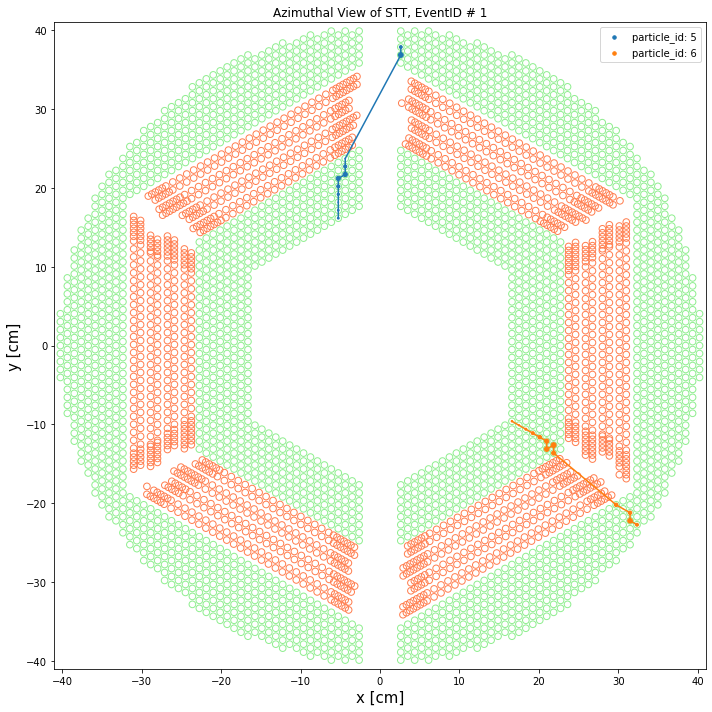

In [29]:
# plot true event
fig, ax = detector_layout(figsize=(10, 10))
e_id = int(true_track.event_file[-10:])
p_ids = np.unique(true_track.pid)

for pid in p_ids:
    idx = true_track.pid == pid
    ax.plot(x[idx], y[idx], "-", linewidth=1.5)
    ax.scatter(
        x[idx], y[idx], s=(ir[idx] * 50), label="particle_id: {}".format(int(pid))
    )

ax.set_title("Azimuthal View of STT, EventID # {}".format(e_id))
ax.legend(fontsize=10, loc="best")
fig.tight_layout()
# fig.savefig("true_track.png")

### _(2.) Read Reco Track_

In [30]:
inputdir = "../run_all/fwp_gnn_segmenting/seg"
reco_trkx = sorted(glob.glob(os.path.join(inputdir, "*")))

In [31]:
print("Track Id: ", reco_trkx[event_idx])

Track Id:  ../run_all/fwp_gnn_segmenting/seg/1


In [32]:
reco_track = torch.load(reco_trkx[event_idx], map_location=device)
print("Length of Data: {}".format(len(reco_track)))

Length of Data: 25


In [33]:
reco_track.head()

hit_id  track_id
0      23         0
1      24         0
2      25         0
3      26         0
4      27         0

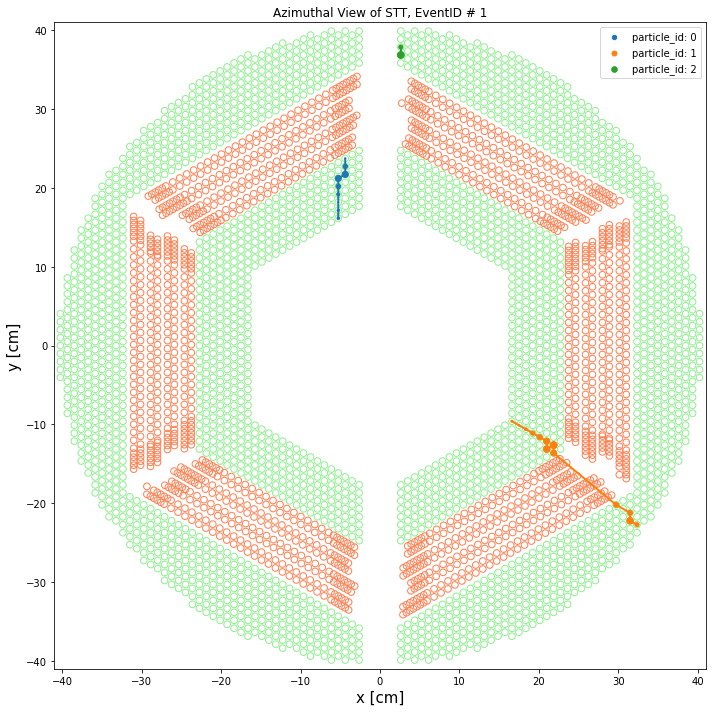

In [34]:
# plot reco event, here, (x,y,ir) comes from ture event. but idx is from reco event
fig, ax = detector_layout(figsize=(10, 10))
e_id = e_id
t_ids = np.unique(reco_track.track_id)

for tid in t_ids:
    idx = reco_track.track_id == tid
    ax.plot(x[idx], y[idx], "-", linewidth=2)
    ax.scatter(x[idx], y[idx], s=(ir[idx] * 100), label="particle_id: {}".format(tid))

ax.set_title("Azimuthal View of STT, EventID # {}".format(e_id))
ax.legend(fontsize=10, loc="best")
fig.tight_layout()
# fig.savefig("reco_track.png")

### _(3.) Read Track Evaluation Data_

In [35]:
inputdir = "../run_all/fwp_gnn_segmenting/eval"

In [36]:
evtid = int(os.path.split(reco_trkx[1006])[1])

In [37]:
print("evtid: {}".format(evtid))

evtid: 10911


In [38]:
!./eval_reco_evt.sh $evtid

Out of 29703 events processing 1 events with 8 workers
Output directory: /home/adeak977/current/3_deeptrkx/ctd2022_mu/run_all/fwp_gnn_segmenting/eval
Finihed evaluation and saving output to 10911_<filename>


In [39]:
# path to HDF5 Store
hdf5_path = inputdir + "/{}_particles.h5".format(evtid)
print(hdf5_path)

../run_all/fwp_gnn_segmenting/eval/10911_particles.h5


In [40]:
df = pd.read_hdf(hdf5_path)
print("Length of Data: {}".format(len(df)))

Length of Data: 3


In [41]:
df.head()

particle_id        pt        vx       vy        vz  q  pdgcode    ptheta  \
0            4  0.347001 -0.073392  2.80093  11.25650 -1    -2212  0.385137   
1            5  0.082030 -0.073392  2.80093  11.25650  1      211  0.696260   
2            6  0.152655  0.068595 -2.61787   6.78146  1     2212  0.323681   

       peta      pphi  n_true_hits  is_matched  is_trackable  evtid  
0  1.634835  1.423528           14        True          True  10911  
1  1.013598  2.743474            6        True         False  10911  
2  1.812358 -1.420574           12        True          True  10911

In [42]:
# Read the Summary of Evaluation
sum_path = inputdir + "/{}_summary.txt".format(evtid)
print(sum_path)

../run_all/fwp_gnn_segmenting/eval/10911_summary.txt


In [43]:
with open(sum_path) as f:
    contents = f.read()
    print(contents)

--------------------------------------------------
                    Run Time: 20230324-184102
        Reconstructed tracks: /home/adeak977/current/3_deeptrkx/ctd2022_mu/run_all/fwp_gnn_segmenting/seg
                 # of events:          1
                Truth tracks:          3
        Truth tracks matched:          3
           Truth tracks reco:          2
   Truth tracks reco matched:          2
                Reco. tracks:          3
        Reco. tracks matched:          3
 Reco. tracks matched to POI:          3
     Reco. tracks duplicated:          0
 Tracking Efficiency (Phys.):   100.0000%
 Tracking Efficiency (Tech.):   100.0000%
             Tracking Purity:   100.0000%
                   Fake Rate:     0.0000%
            Duplication Rate:     0.0000%

